In [1]:
### import packages 
from brian2 import *
from brian2.units import *
from brian2 import ms, mV, pA, pF, siemens, amp, second, NeuronGroup, defaultclock, run
from brian2tools import *
import matplotlib.pyplot as plt
import random
import numpy as np
import json

from result import Visualization
from models.AdEx import NeuronModel

import subprocess
from IPython.display import display, Markdown
from simulation_runner import plot_results, run_simulation, load_params

### Modeling Result

Converted parameters: {'g_L': 6.46 * nsiemens, 'vr': -85.4 * mvolt, 'th': -45. * mvolt, 'E_L': -85.4 * mvolt, 'C': 157. * pfarad, 'I': 300. * pamp}


INFO:root:creating /var/folders/tj/9vhjqp2n63ng9609fgfkf_dc0000gn/T/brian_flag_test_173guvoy/var
INFO:root:creating /var/folders/tj/9vhjqp2n63ng9609fgfkf_dc0000gn/T/brian_flag_test_173guvoy/var/folders
INFO:root:creating /var/folders/tj/9vhjqp2n63ng9609fgfkf_dc0000gn/T/brian_flag_test_173guvoy/var/folders/tj
INFO:root:creating /var/folders/tj/9vhjqp2n63ng9609fgfkf_dc0000gn/T/brian_flag_test_173guvoy/var/folders/tj/9vhjqp2n63ng9609fgfkf_dc0000gn
INFO:root:creating /var/folders/tj/9vhjqp2n63ng9609fgfkf_dc0000gn/T/brian_flag_test_173guvoy/var/folders/tj/9vhjqp2n63ng9609fgfkf_dc0000gn/T
INFO:root:creating /var/folders/tj/9vhjqp2n63ng9609fgfkf_dc0000gn/T/brian_flag_test_173guvoy/var/folders/tj/9vhjqp2n63ng9609fgfkf_dc0000gn/T/brian_flag_test_173guvoy
INFO:root:arm64-apple-darwin20.0.0-clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -fwrapv -O2 -Wall -fPIC -O2 -isystem /opt/anaconda3/envs/brain/include -arch arm64 -fPIC -O2 -isystem /opt/anaconda3/envs/brain/include -arch

<Figure size 1500x800 with 0 Axes>

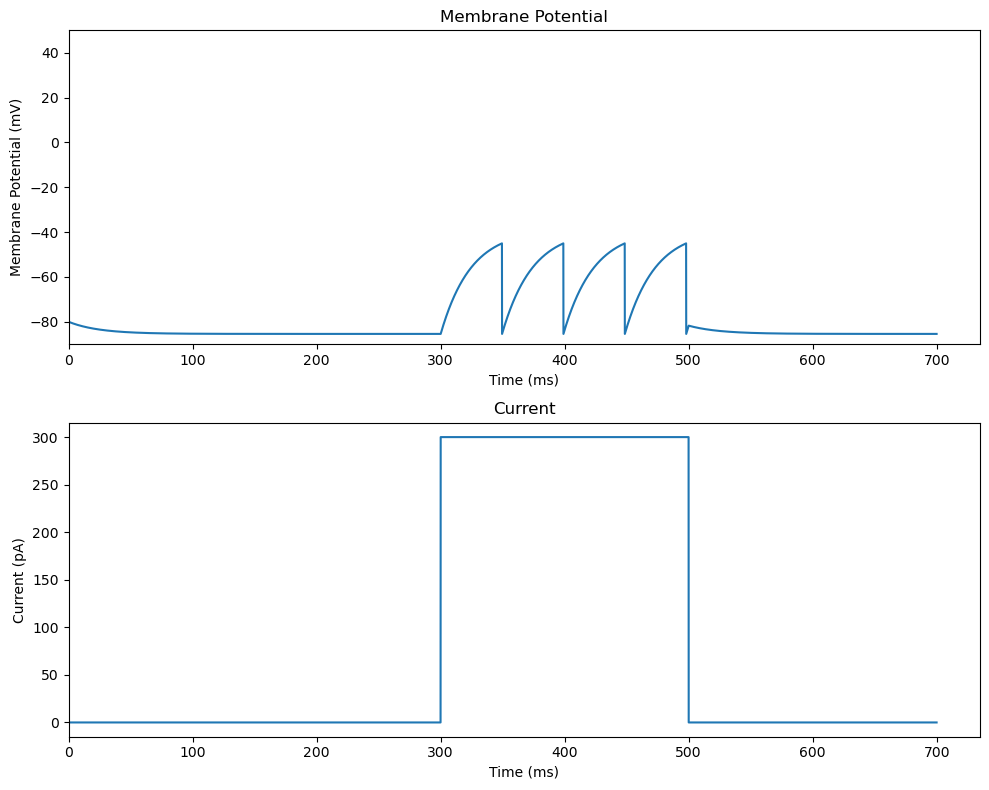

In [2]:
### Leaky Integrate and Fire 
json_file = './params/LIF.json' 

# load parameters
params, model_name = load_params(json_file)
N = params.pop('N')['value'] 

# simulation 
results = run_simulation(N, params, model_name)

# visualization
plot_results(results)

### AdEx spontaneous
- set I as 100pA

Converted parameters: {'g_L': 12. * nsiemens, 'E_L': -58. * mvolt, 'Delta_T': 7. * mvolt, 'vt': -58. * mvolt, 'v': -10. * mvolt, 'vr': -70. * mvolt, 'tau_w': 12. * msecond, 'a': 8. * nsiemens, 'd': 3. * pamp, 'C': 115. * pfarad, 'I': 100. * pamp}


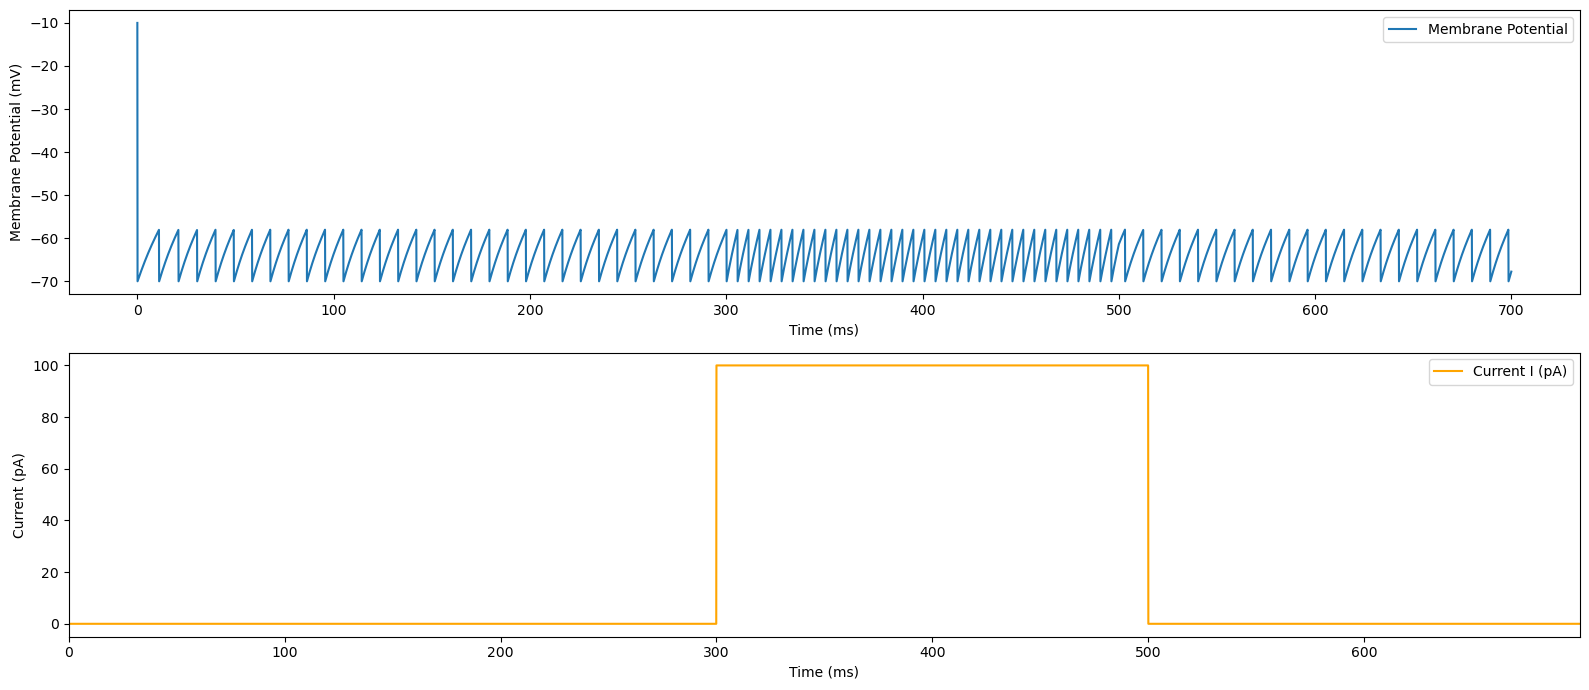

In [ ]:
### Adaptive Exponential Integrate and Fire (v > threshold)
json_file = './AdEx2.json' 

# load parameters
params, model_name = load_params(json_file)
N = params.pop('N')['value']  

# simulation 
sim = run_simulation(N, params, model_name)

# visualization
sim.plot_results()

### Monitoring with different I

- 초기 v를 다르게 설정했을때 I가 30pA인경우부터 current onset time 이후 패턴이 차이나는 것을 확인할 수 있음
    - 특히 I가 60pA, 90pA인 경우 차이가 발생함
    - I가 180pA인 경우에 onset time 부분에 튀는 패턴에 차이가 있음

In [1]:
### import packages 
from brian2 import *
from brian2.units import *
from brian2 import ms
from brian2tools import *
import matplotlib.pyplot as plt
import random
import numpy as np
import json

from simulation_I import run_simulation, load_params, plot_results

INFO:root:creating /var/folders/tj/9vhjqp2n63ng9609fgfkf_dc0000gn/T/brian_flag_test_t7w2tn0z/var
INFO:root:creating /var/folders/tj/9vhjqp2n63ng9609fgfkf_dc0000gn/T/brian_flag_test_t7w2tn0z/var/folders
INFO:root:creating /var/folders/tj/9vhjqp2n63ng9609fgfkf_dc0000gn/T/brian_flag_test_t7w2tn0z/var/folders/tj
INFO:root:creating /var/folders/tj/9vhjqp2n63ng9609fgfkf_dc0000gn/T/brian_flag_test_t7w2tn0z/var/folders/tj/9vhjqp2n63ng9609fgfkf_dc0000gn
INFO:root:creating /var/folders/tj/9vhjqp2n63ng9609fgfkf_dc0000gn/T/brian_flag_test_t7w2tn0z/var/folders/tj/9vhjqp2n63ng9609fgfkf_dc0000gn/T
INFO:root:creating /var/folders/tj/9vhjqp2n63ng9609fgfkf_dc0000gn/T/brian_flag_test_t7w2tn0z/var/folders/tj/9vhjqp2n63ng9609fgfkf_dc0000gn/T/brian_flag_test_t7w2tn0z
INFO:root:arm64-apple-darwin20.0.0-clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -fwrapv -O2 -Wall -fPIC -O2 -isystem /opt/anaconda3/envs/brain/include -arch arm64 -fPIC -O2 -isystem /opt/anaconda3/envs/brain/include -arch

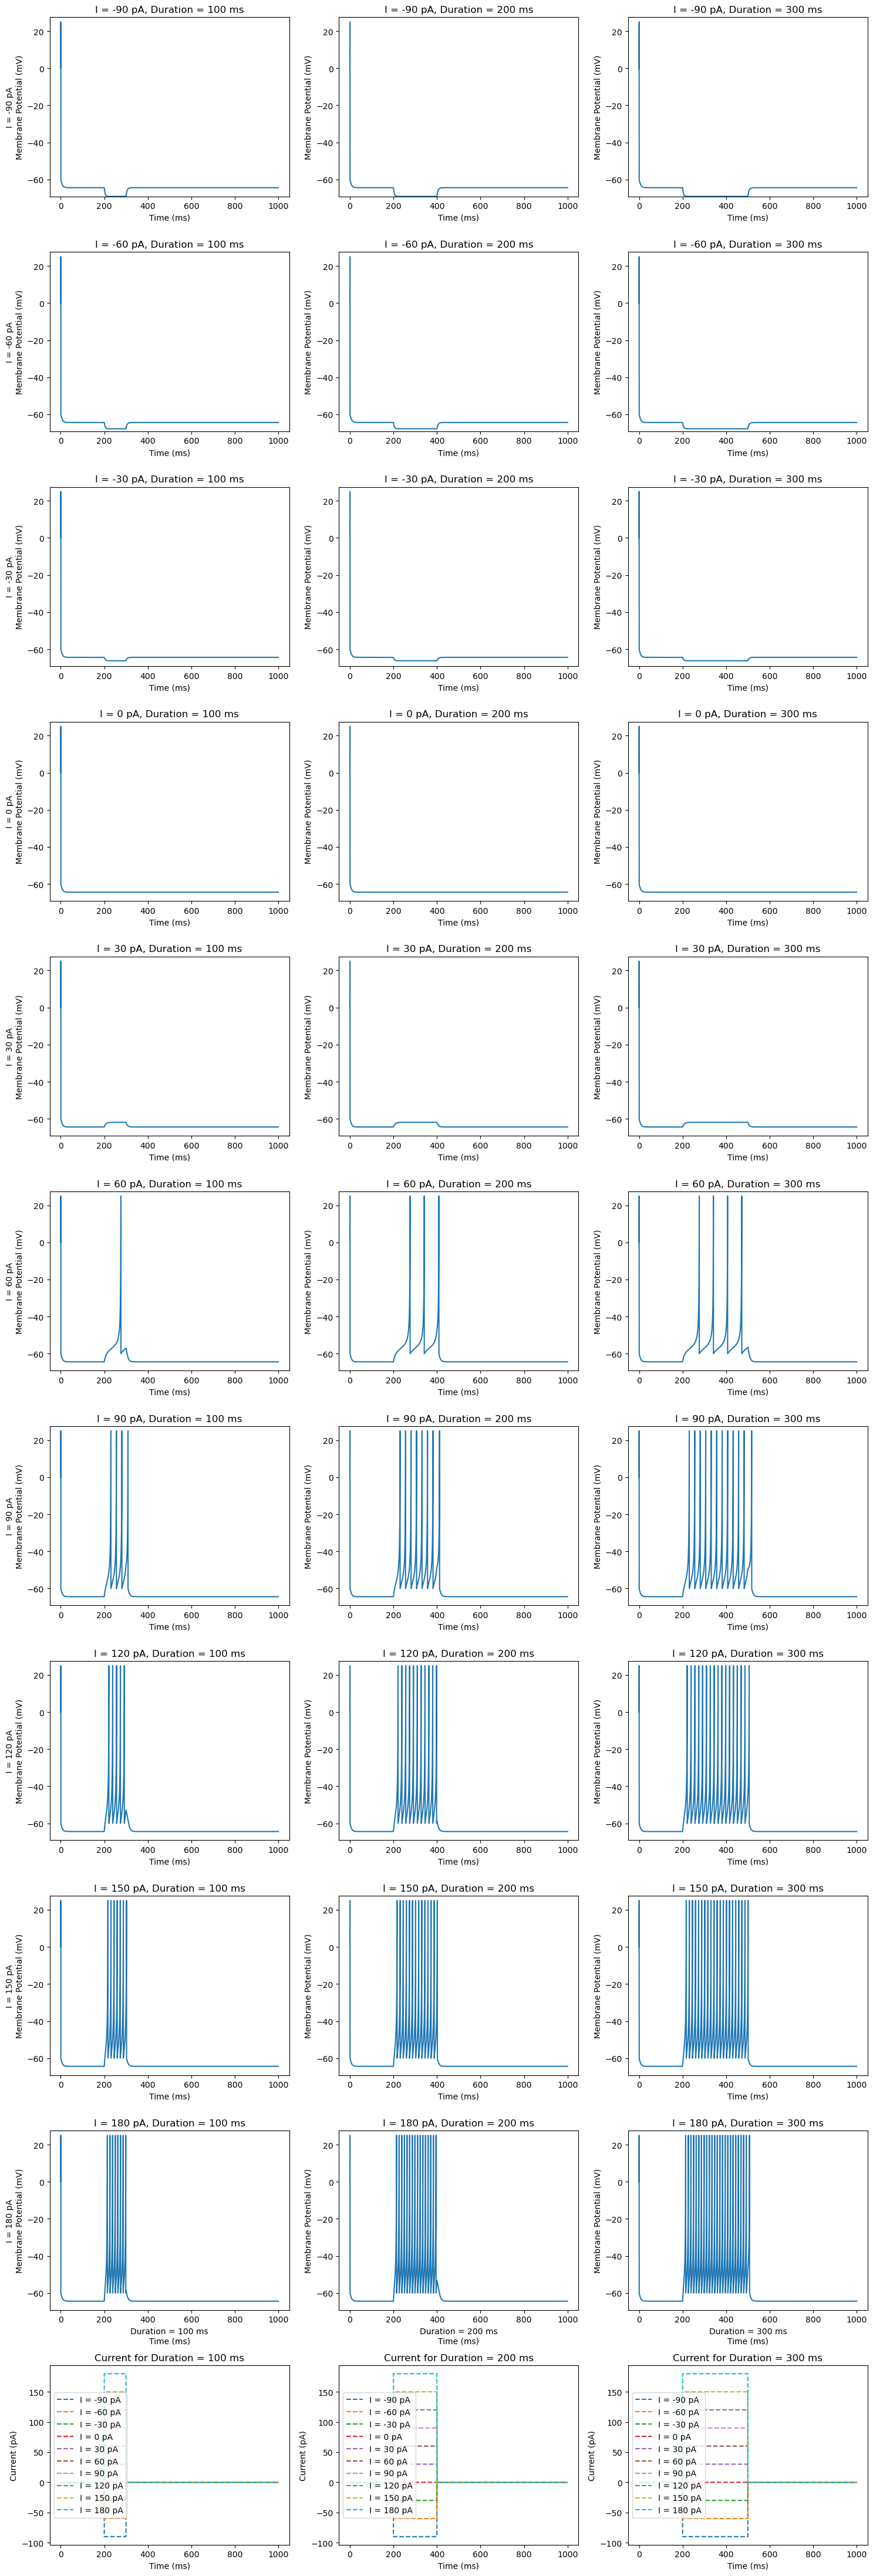

In [2]:
### v: 0mV
json_file = './params_ref/FSN_1.json'  

# Load parameters
params, model_name = load_params(json_file)

N = params.pop('N')['value']  
I_values = [-90, -60, -30, 0, 30, 60, 90, 120, 150, 180]
durations = [100, 200, 300]  

# Run simulation
all_results, all_currents, total_time, injection_times = run_simulation(
    N, params, model_name, I_values, durations, injection_start_time = 200 * ms
)
# Plot results
plot_results(all_results, all_currents, I_values, total_time, injection_times, durations)

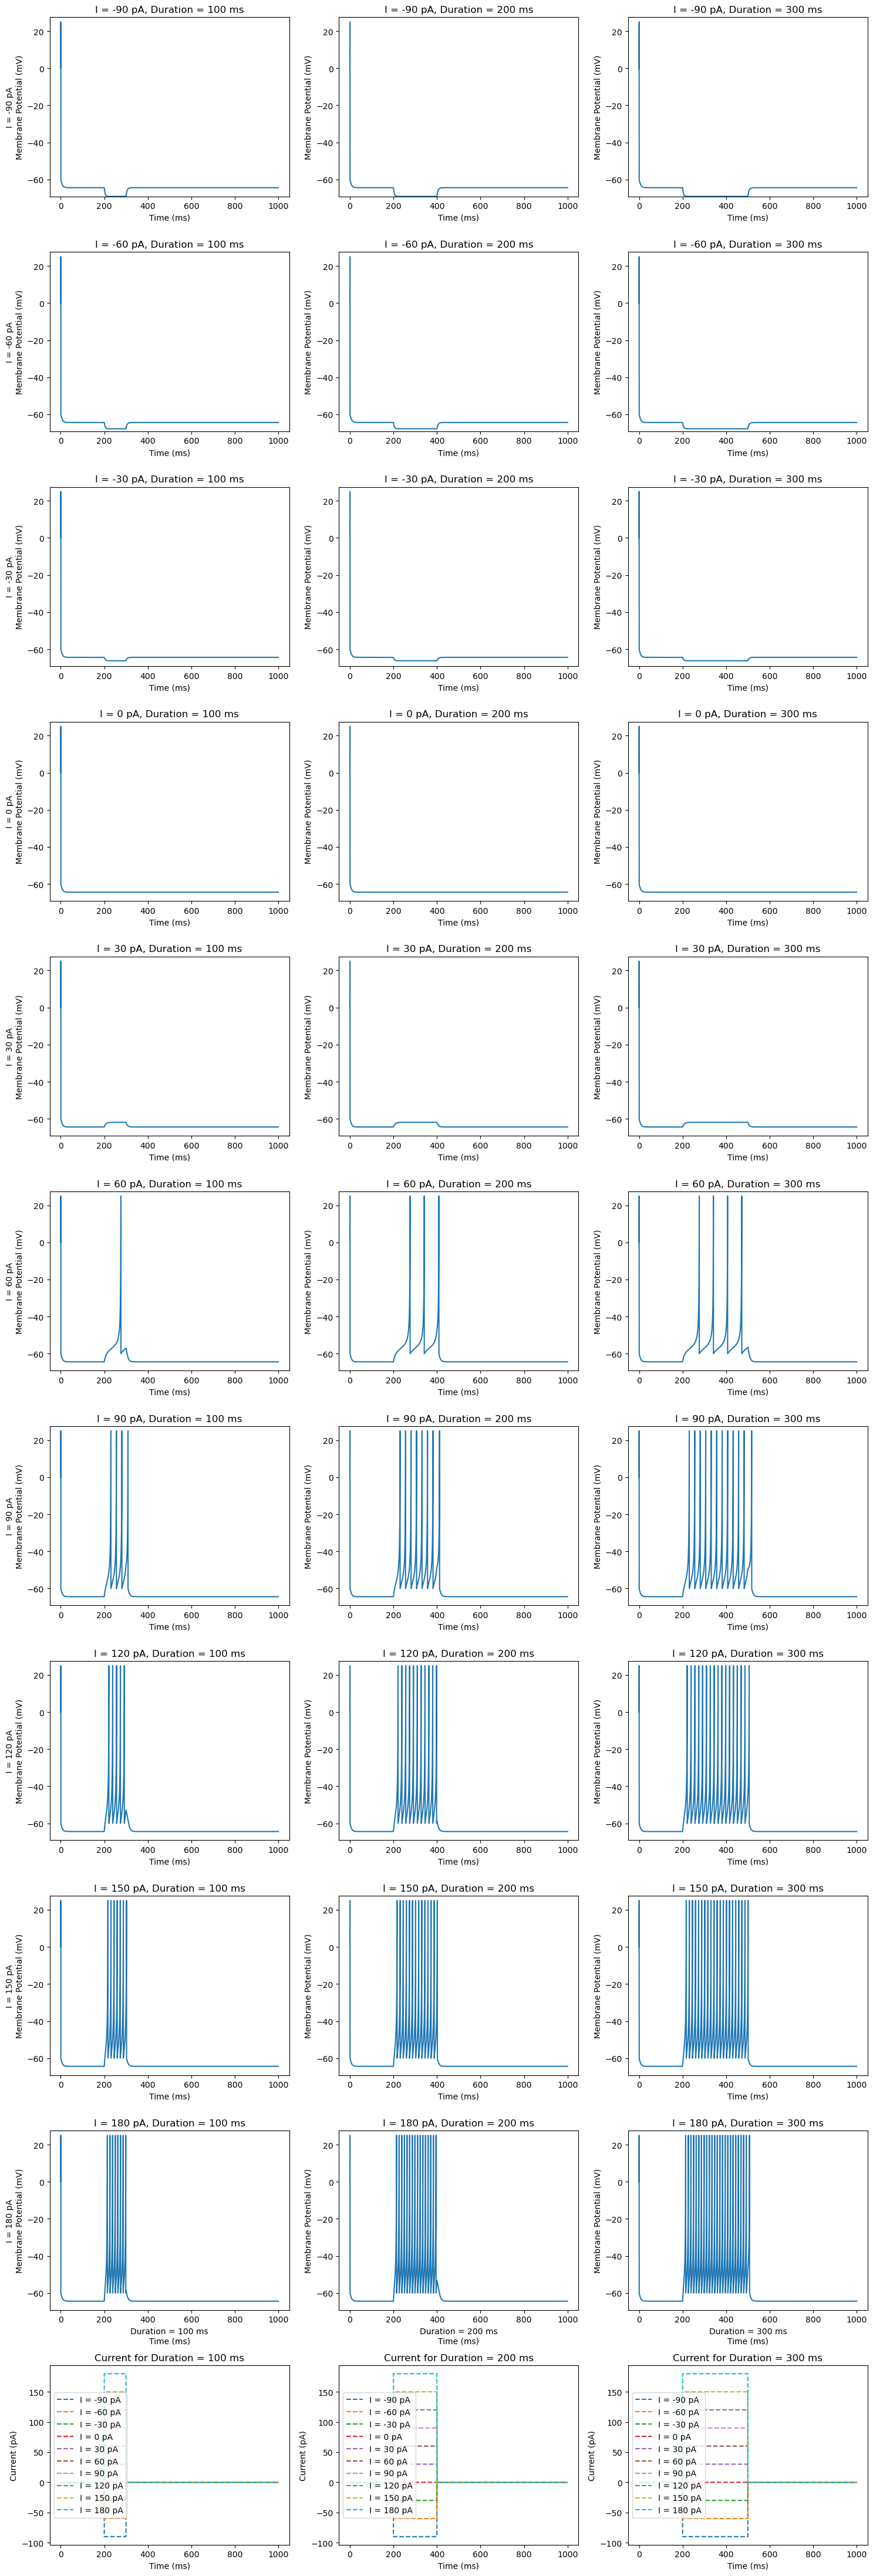

In [3]:
### v: -80mV
json_file = './params_ref/FSN_1.json'  

# Load parameters
params, model_name = load_params(json_file)

N = params.pop('N')['value']  
I_values = [-90, -60, -30, 0, 30, 60, 90, 120, 150, 180]
durations = [100, 200, 300]  

# Run simulation
all_results, all_currents, total_time, injection_times = run_simulation(
    N, params, model_name, I_values, durations, injection_start_time = 200 * ms
)
# Plot results
plot_results(all_results, all_currents, I_values, total_time, injection_times, durations)

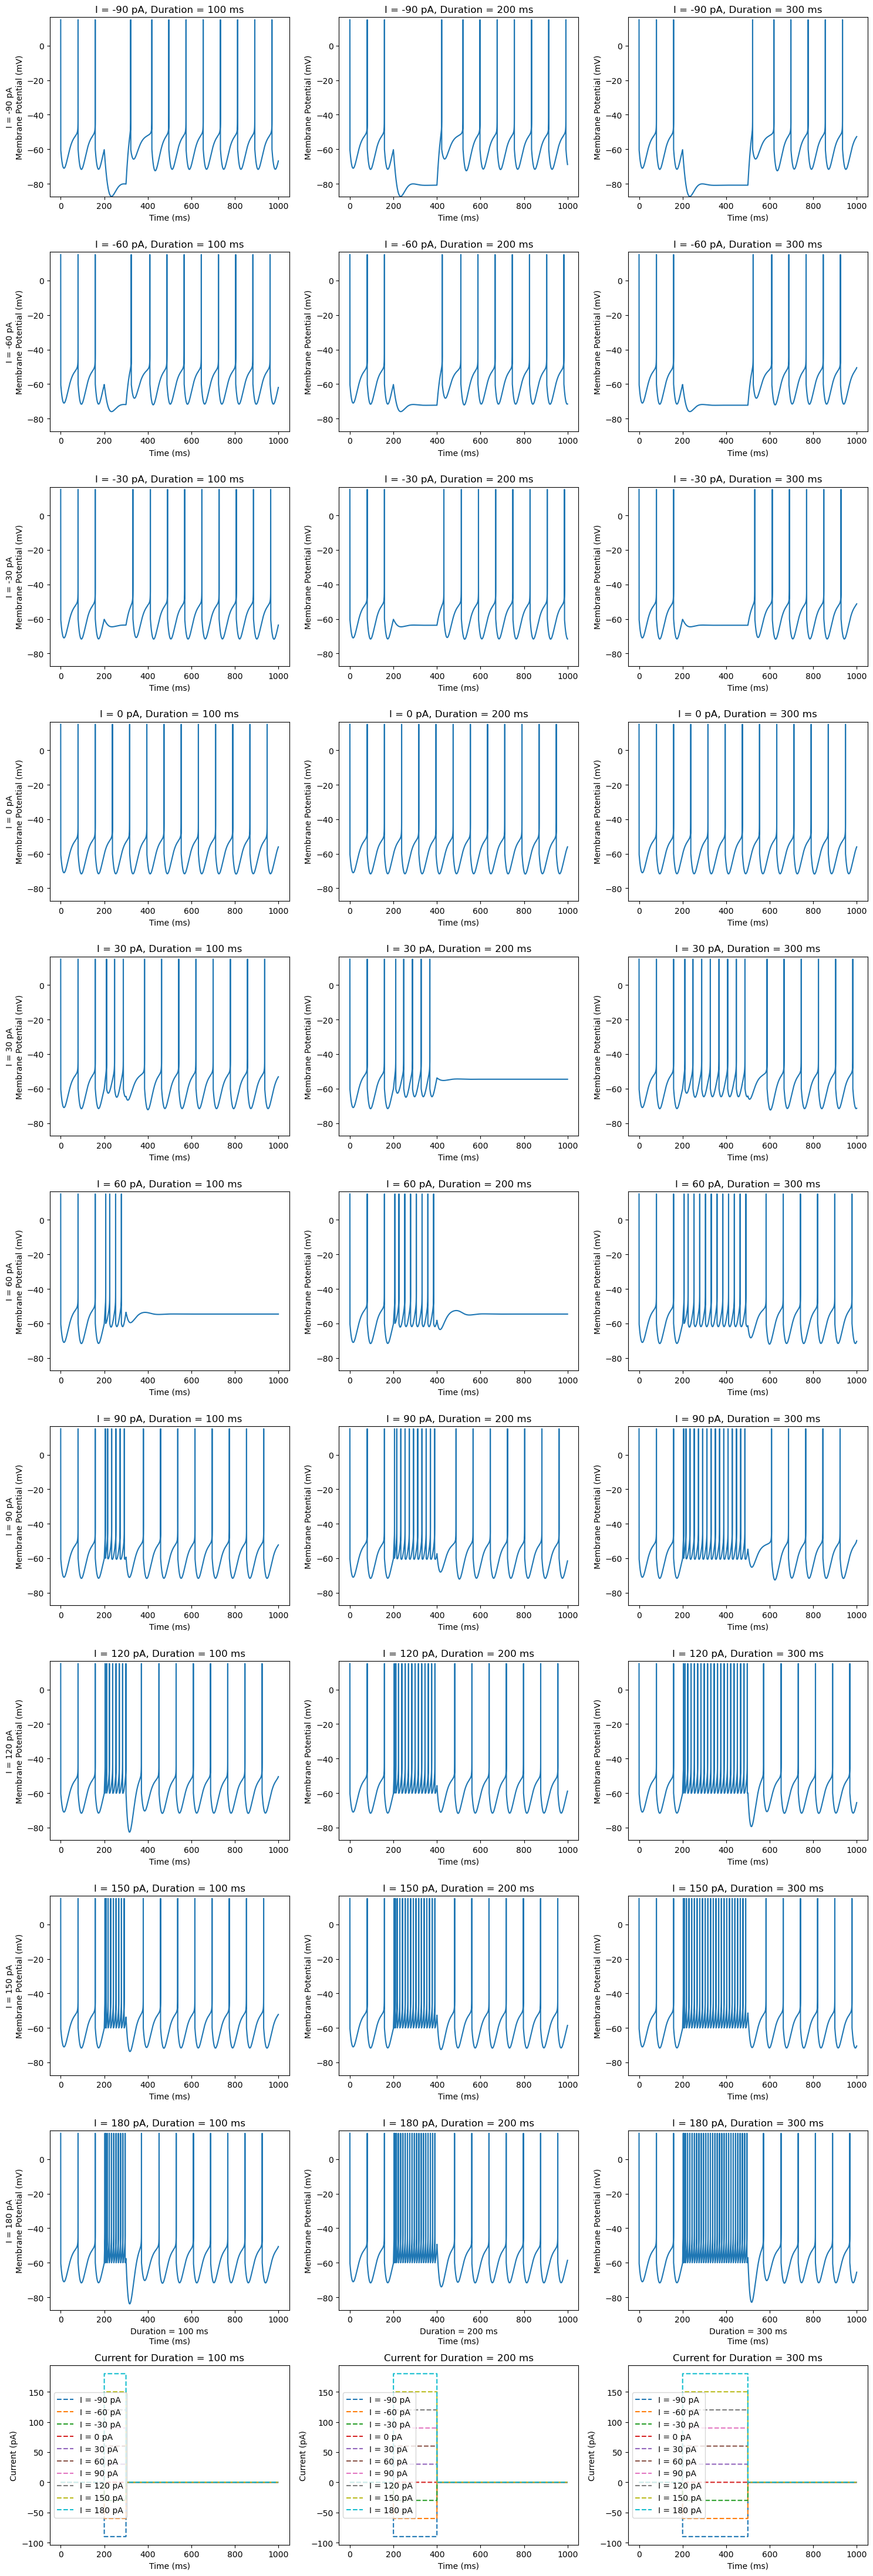

In [4]:
### v: -80mV
json_file = './params_ref/GPe_T1_1.json'  

# load parameters
params, model_name = load_params(json_file)

N = params.pop('N')['value']   
I_values = [-90, -60, -30, 0, 30, 60, 90, 120, 150, 180]
durations = [100, 200, 300]  # Example durations in ms

# Run simulation
all_results, all_currents, total_time, injection_times = run_simulation(
    N, params, model_name, I_values, durations, injection_start_time = 200 * ms
)
# Plot results
plot_results(all_results, all_currents, I_values, total_time, injection_times, durations)

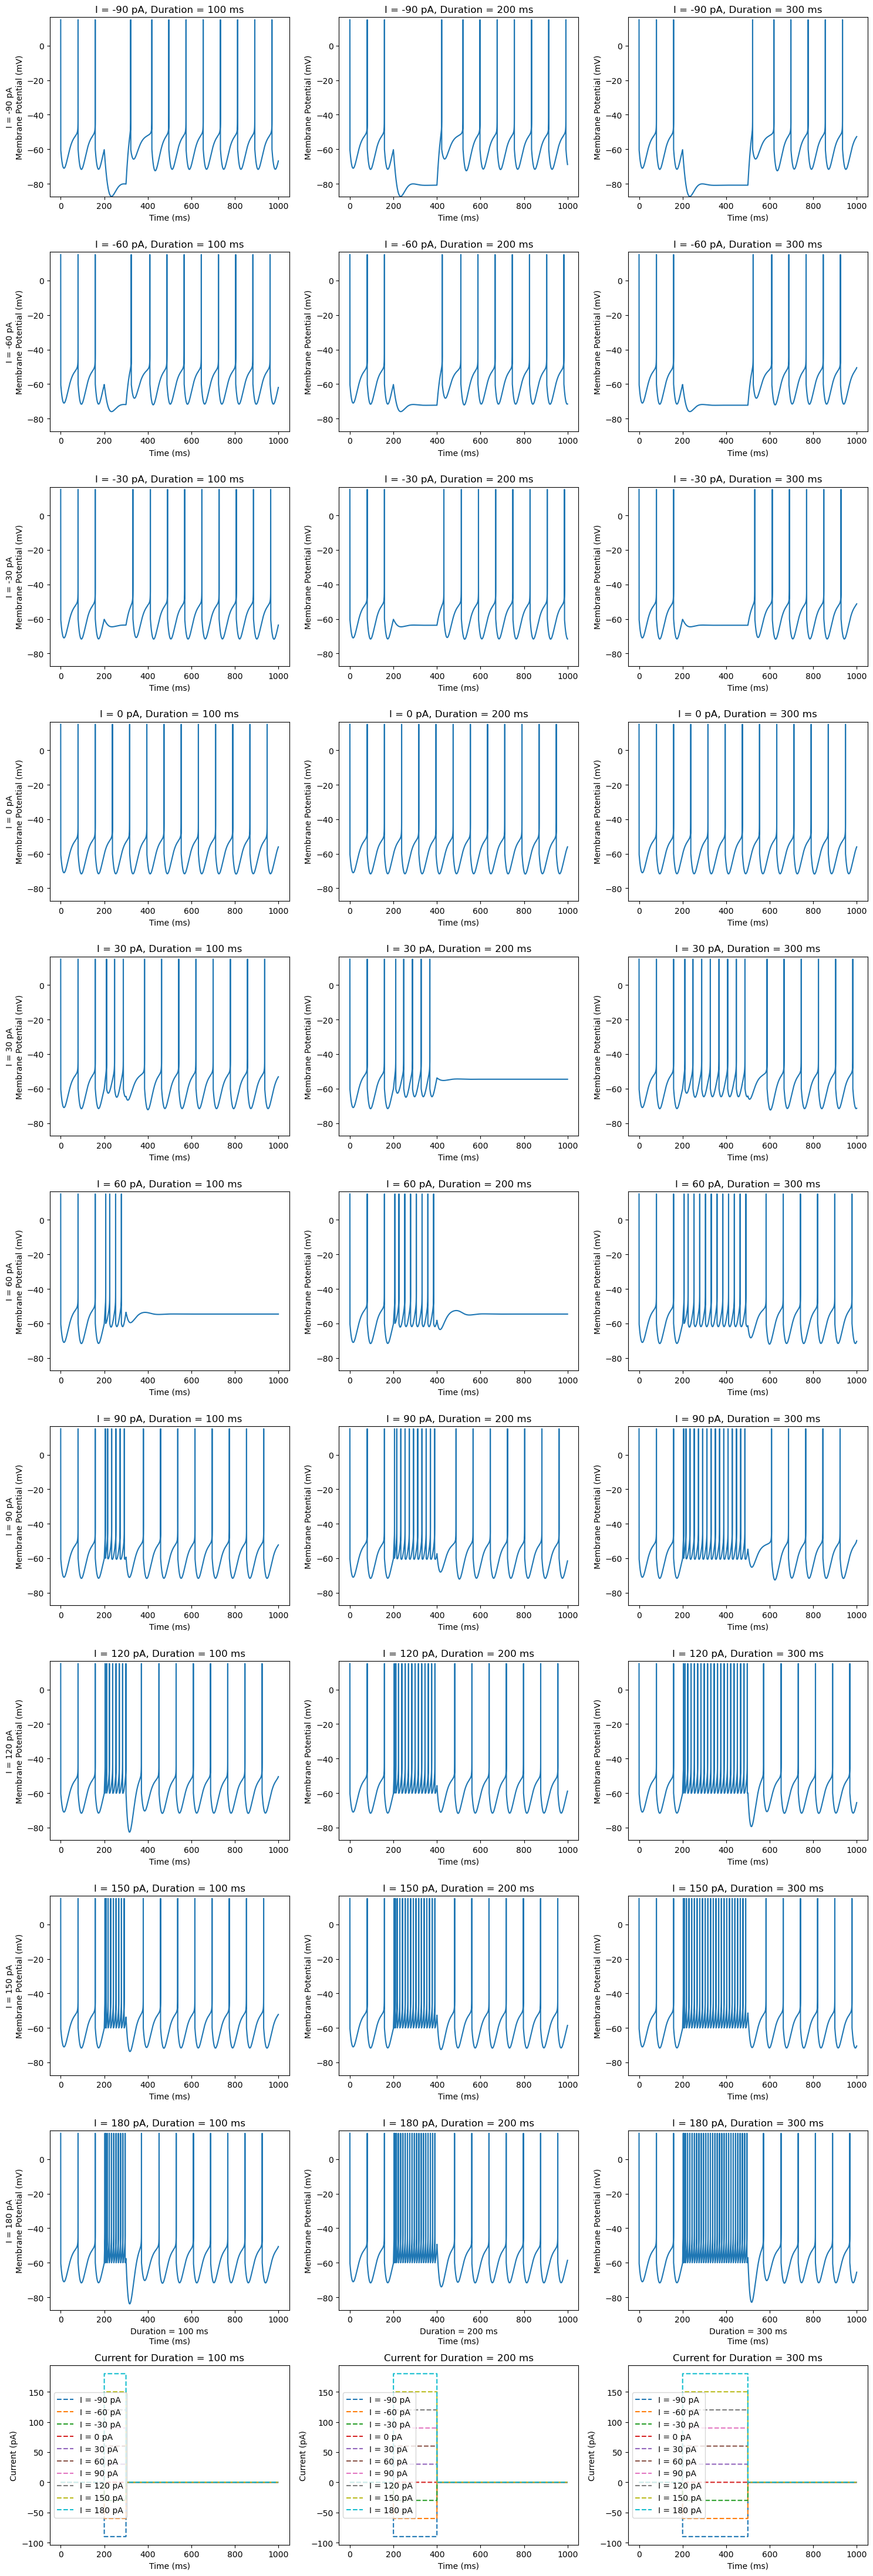

In [5]:
### v: 0mV
json_file = './params_ref/GPe_T1_1.json'  

# load parameters
params, model_name = load_params(json_file)

N = params.pop('N')['value']  
I_values = [-90, -60, -30, 0, 30, 60, 90, 120, 150, 180]
durations = [100, 200, 300]  # Example durations in ms

# Run simulation
all_results, all_currents, total_time, injection_times = run_simulation(
    N, params, model_name, I_values, durations, injection_start_time = 200 * ms
)
# Plot results
plot_results(all_results, all_currents, I_values, total_time, injection_times, durations)

WARNING    'I' is an internal variable of group 'neurongroup', but also exists in the run namespace with the value -180. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    'I' is an internal variable of group 'neurongroup_1', but also exists in the run namespace with the value -180. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    'I' is an internal variable of group 'neurongroup_1', but also exists in the run namespace with the value -150. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    'I' is an internal variable of group 'neurongroup', but also exists in the run namespace with the value -150. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    'I' is an internal variable of group 'neurongroup', but also exists in the run namespace with the value -120. The internal variable w

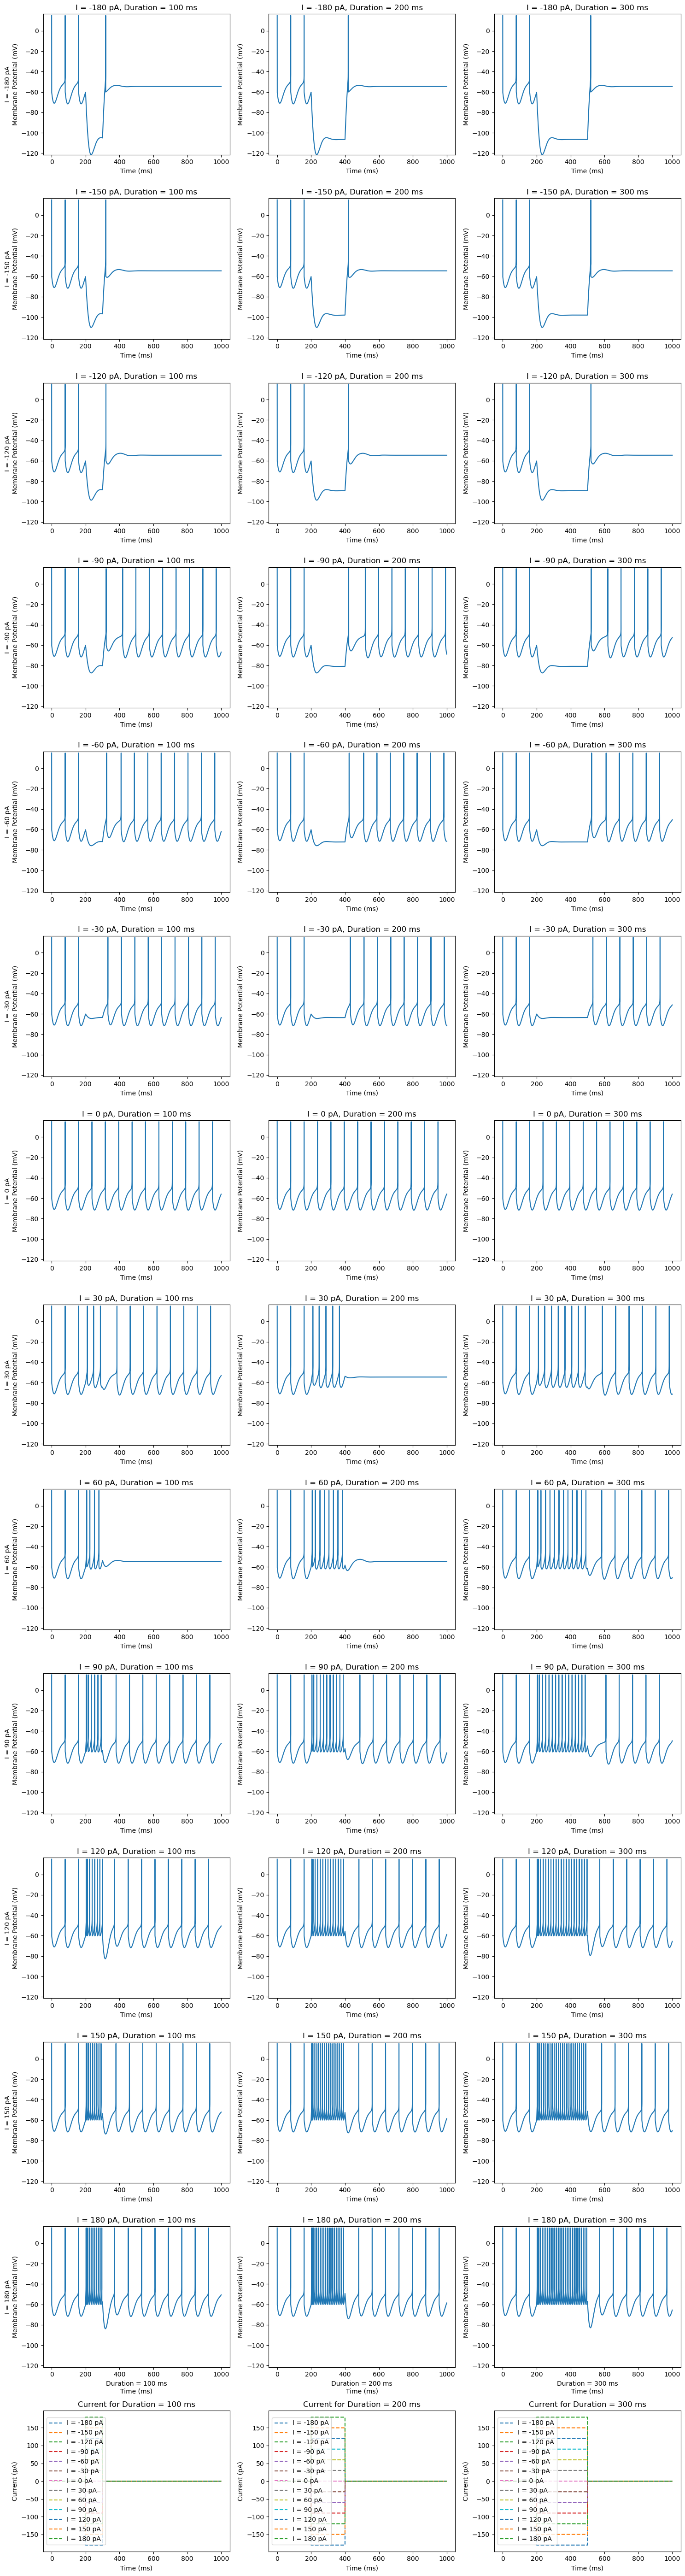

In [6]:
### v: 0mV (with small value I)
json_file = './params_ref/GPe_T1_1.json'  

# load parameters
params, model_name = load_params(json_file)
N = params.pop('N')['value']   
I_values = list(range(-180, 181, 30))
durations = [100, 200, 300]  # Example durations in ms

# Run simulation
all_results, all_currents, total_time, injection_times = run_simulation(
    N, params, model_name, I_values, durations, injection_start_time = 200 * ms
)
# Plot results
plot_results(all_results, all_currents, I_values, total_time, injection_times, durations)

WARNING    'I' is an internal variable of group 'neurongroup_1', but also exists in the run namespace with the value 5. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    'I' is an internal variable of group 'neurongroup', but also exists in the run namespace with the value 5. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    'I' is an internal variable of group 'neurongroup', but also exists in the run namespace with the value 10. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    'I' is an internal variable of group 'neurongroup_1', but also exists in the run namespace with the value 10. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    'I' is an internal variable of group 'neurongroup_1', but also exists in the run namespace with the value 15. The internal variable will be use

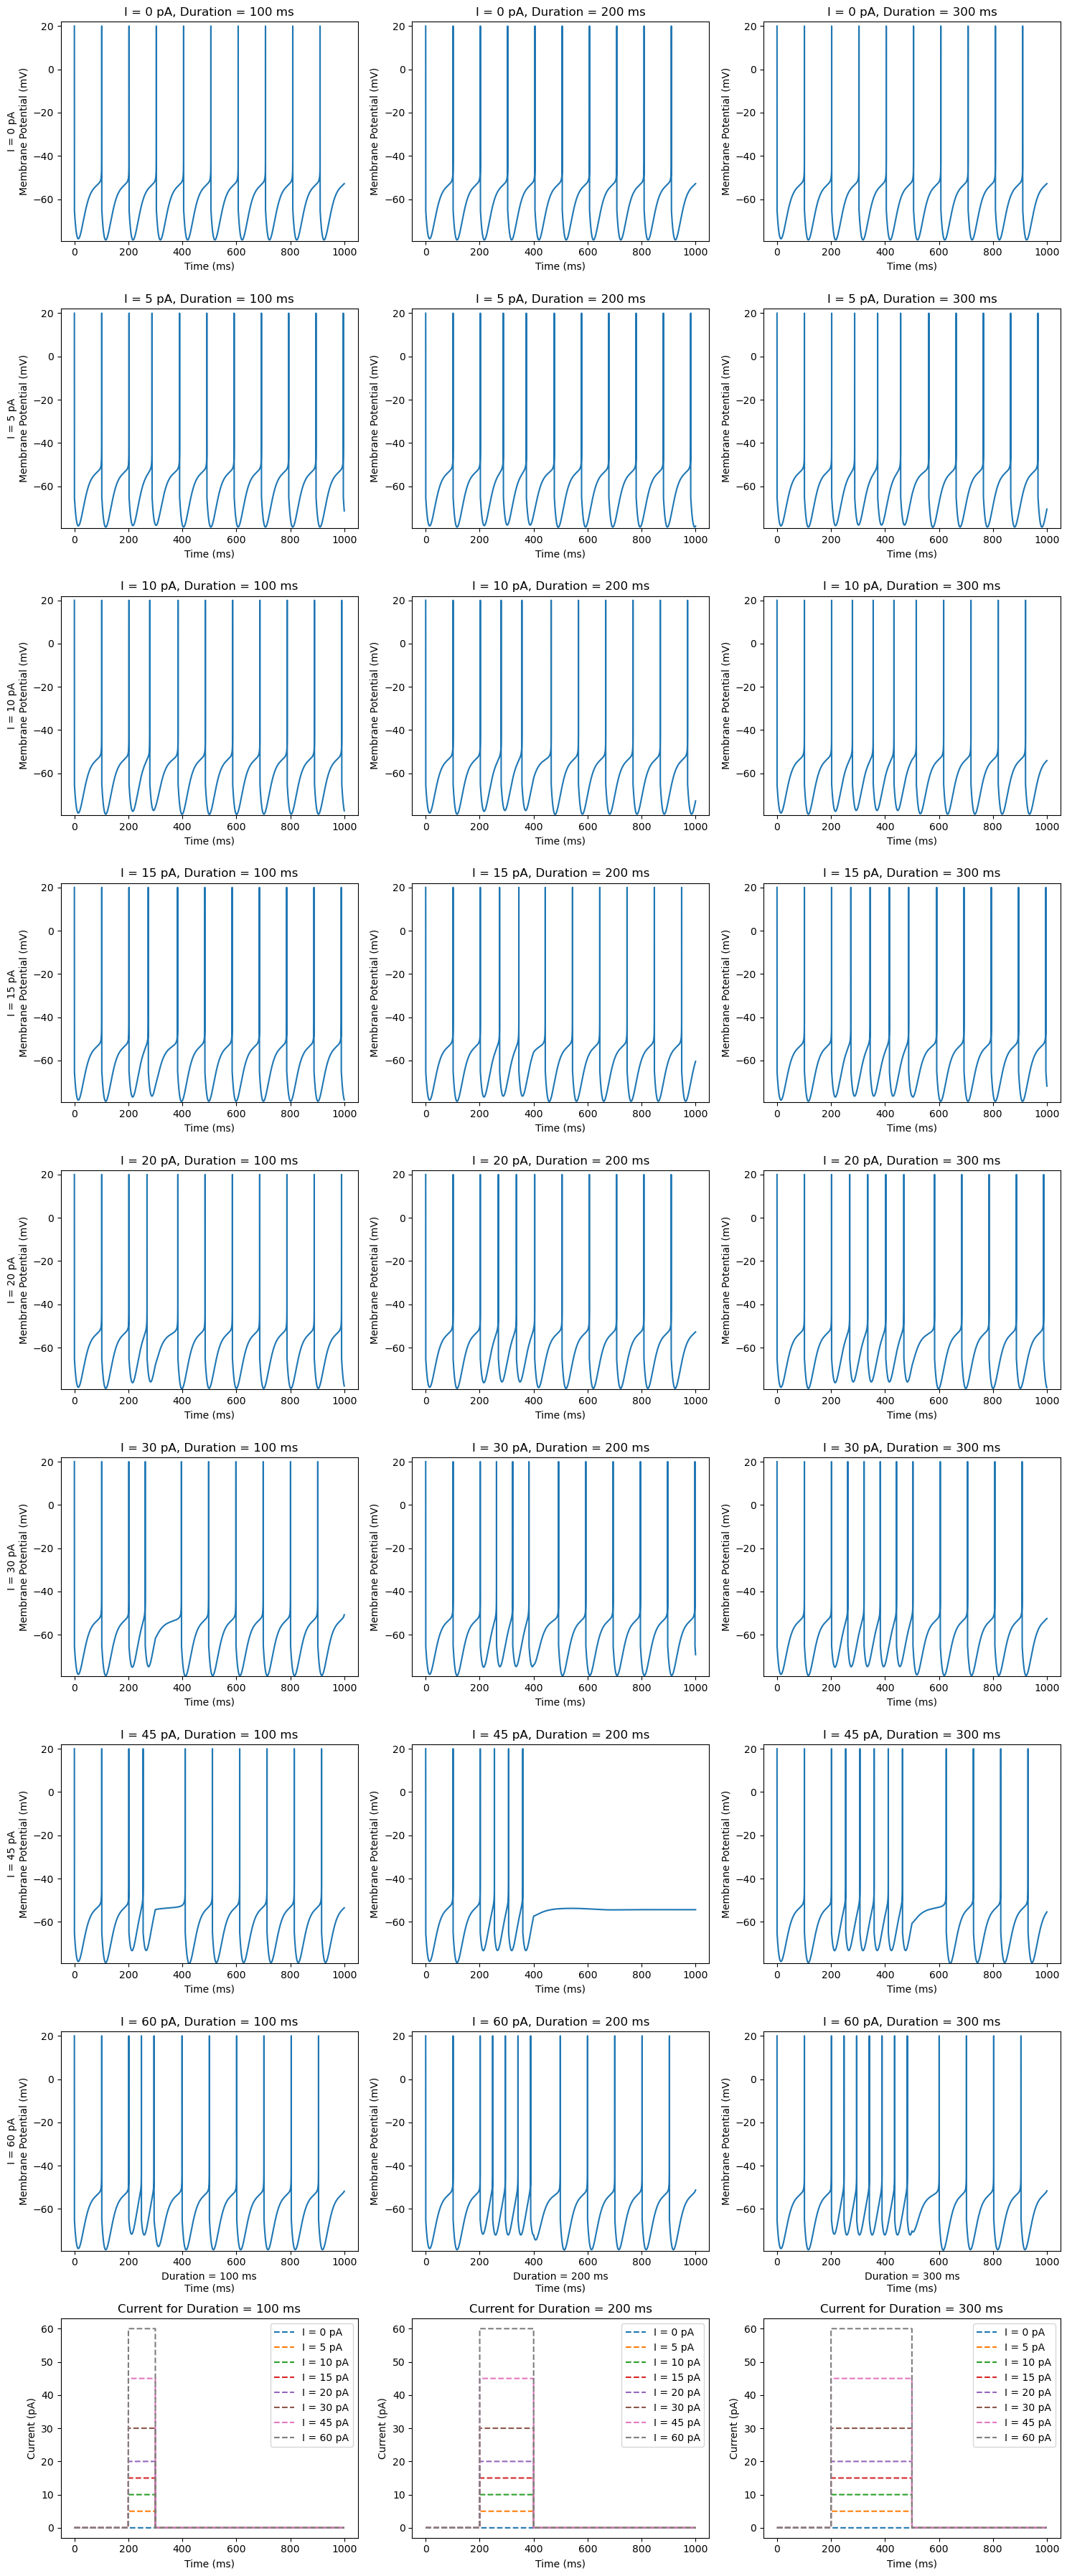

In [7]:
json_file = './params_ref/SNr_1.json'  

# load parameters
params, model_name = load_params(json_file)

N = params.pop('N')['value']   
I_values = [0, 5, 10, 15, 20, 30, 45, 60]
durations = [100, 200, 300]  # Example durations in ms

# Run simulation
all_results, all_currents, total_time, injection_times = run_simulation(
    N, params, model_name, I_values, durations, injection_start_time = 200 * ms
)
# Plot results
plot_results(all_results, all_currents, I_values, total_time, injection_times, durations)

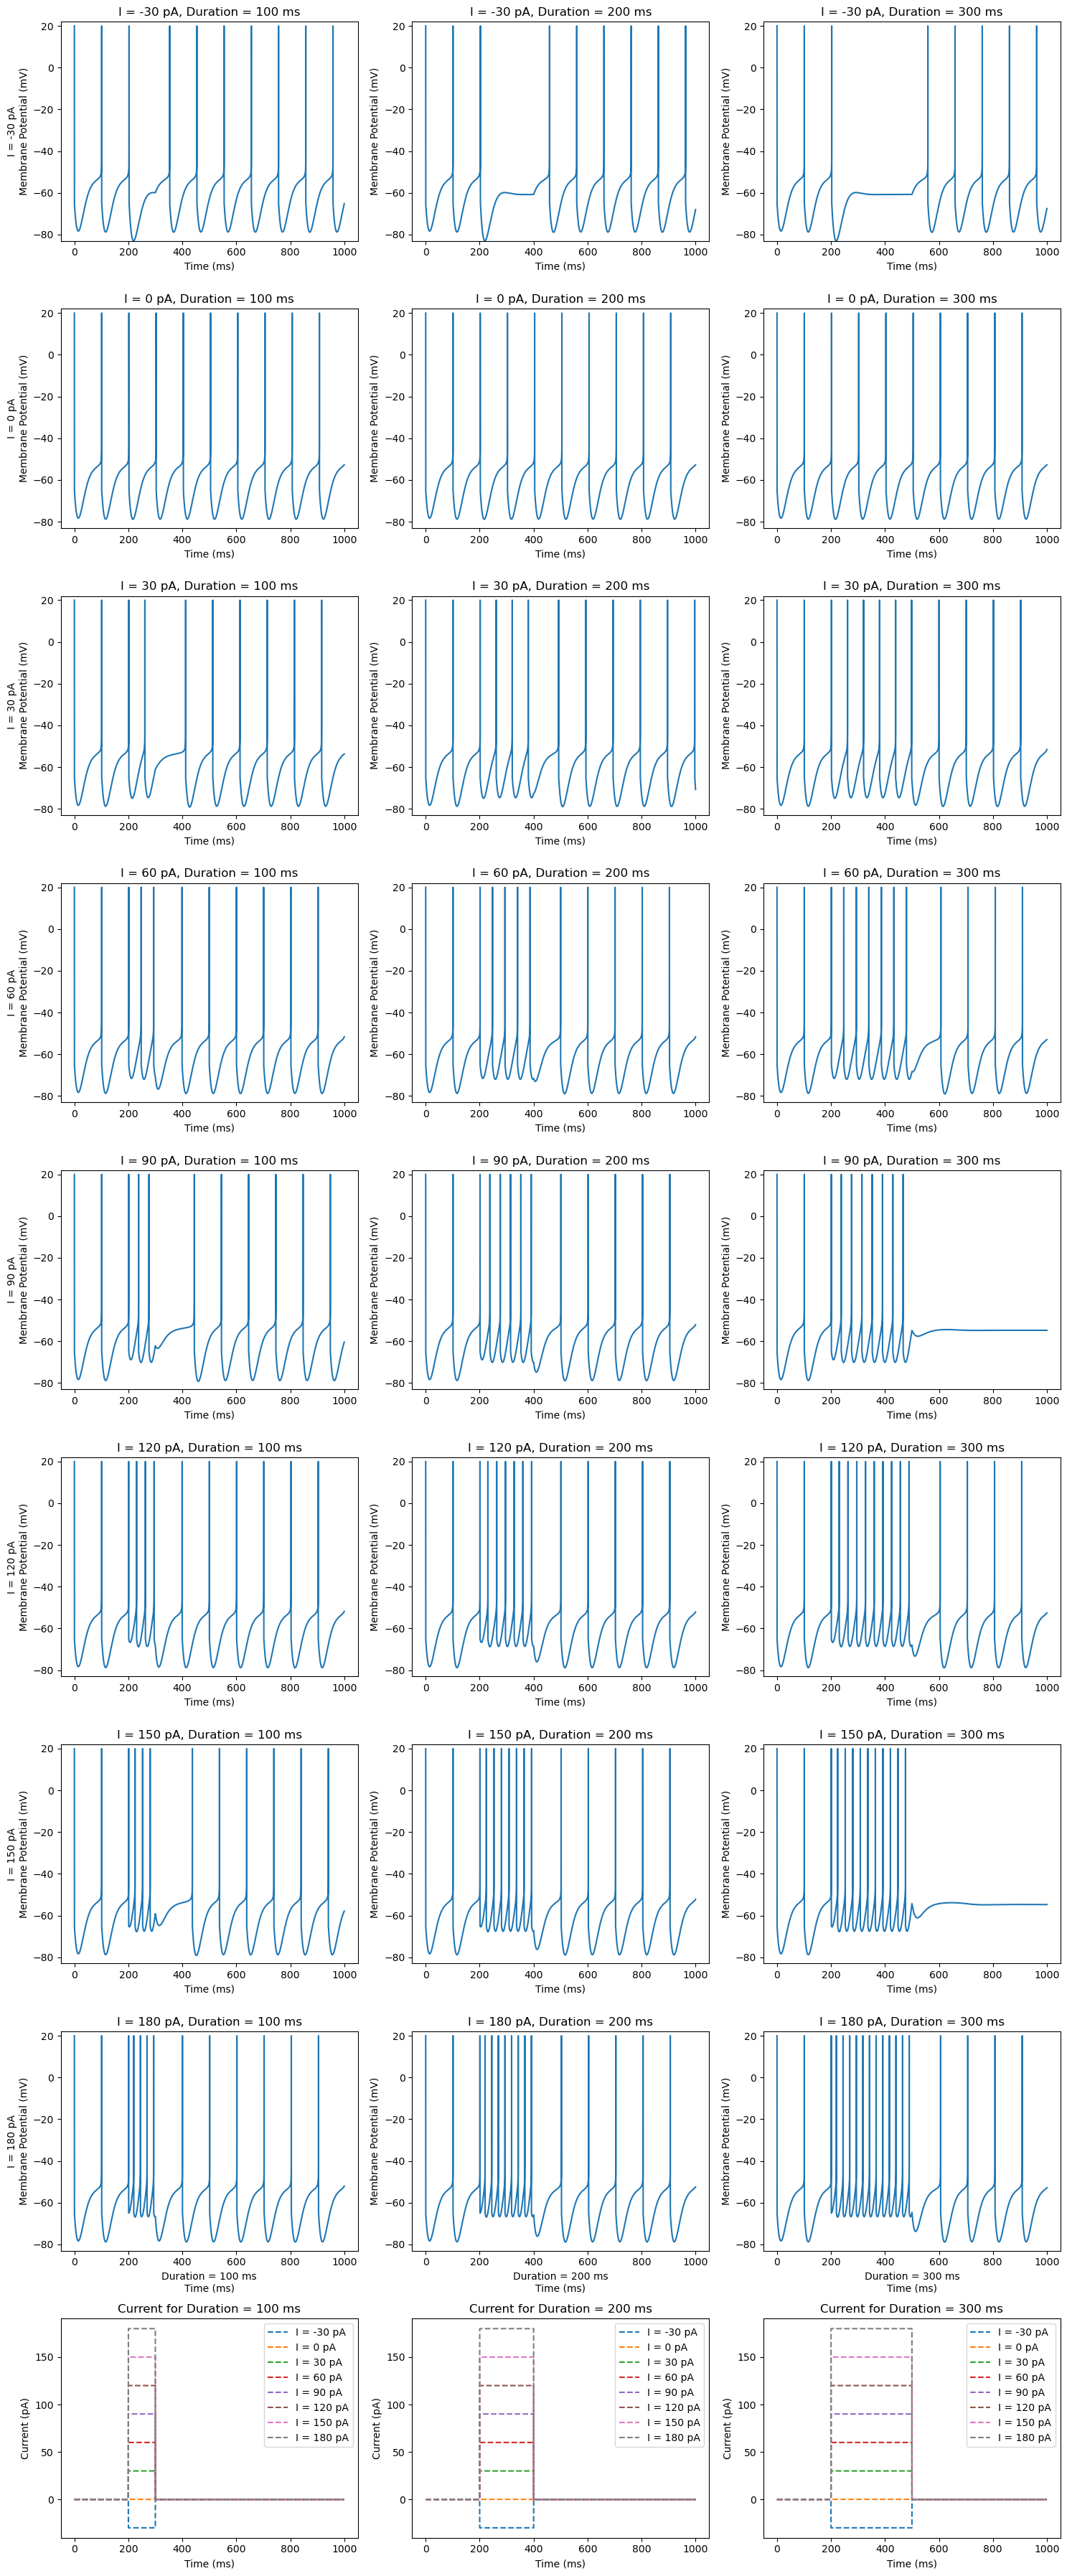

In [8]:
### v: 0mV (with small value I)
json_file = './params_ref/SNr_2.json'  

# load parameters
params, model_name = load_params(json_file)

N = params.pop('N')['value']   
I_values = [-30, 0, 30, 60, 90, 120, 150, 180]
durations = [100, 200, 300]  # Example durations in ms

# Run simulation
all_results, all_currents, total_time, injection_times = run_simulation(
    N, params, model_name, I_values, durations, injection_start_time = 200 * ms
)
# Plot results
plot_results(all_results, all_currents, I_values, total_time, injection_times, durations)

WARNING    'I' is an internal variable of group 'neurongroup', but also exists in the run namespace with the value 25. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    'I' is an internal variable of group 'neurongroup_1', but also exists in the run namespace with the value 25. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    'I' is an internal variable of group 'neurongroup', but also exists in the run namespace with the value 28. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    'I' is an internal variable of group 'neurongroup_1', but also exists in the run namespace with the value 28. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    'I' is an internal variable of group 'neurongroup', but also exists in the run namespace with the value 32. The internal variable will be use

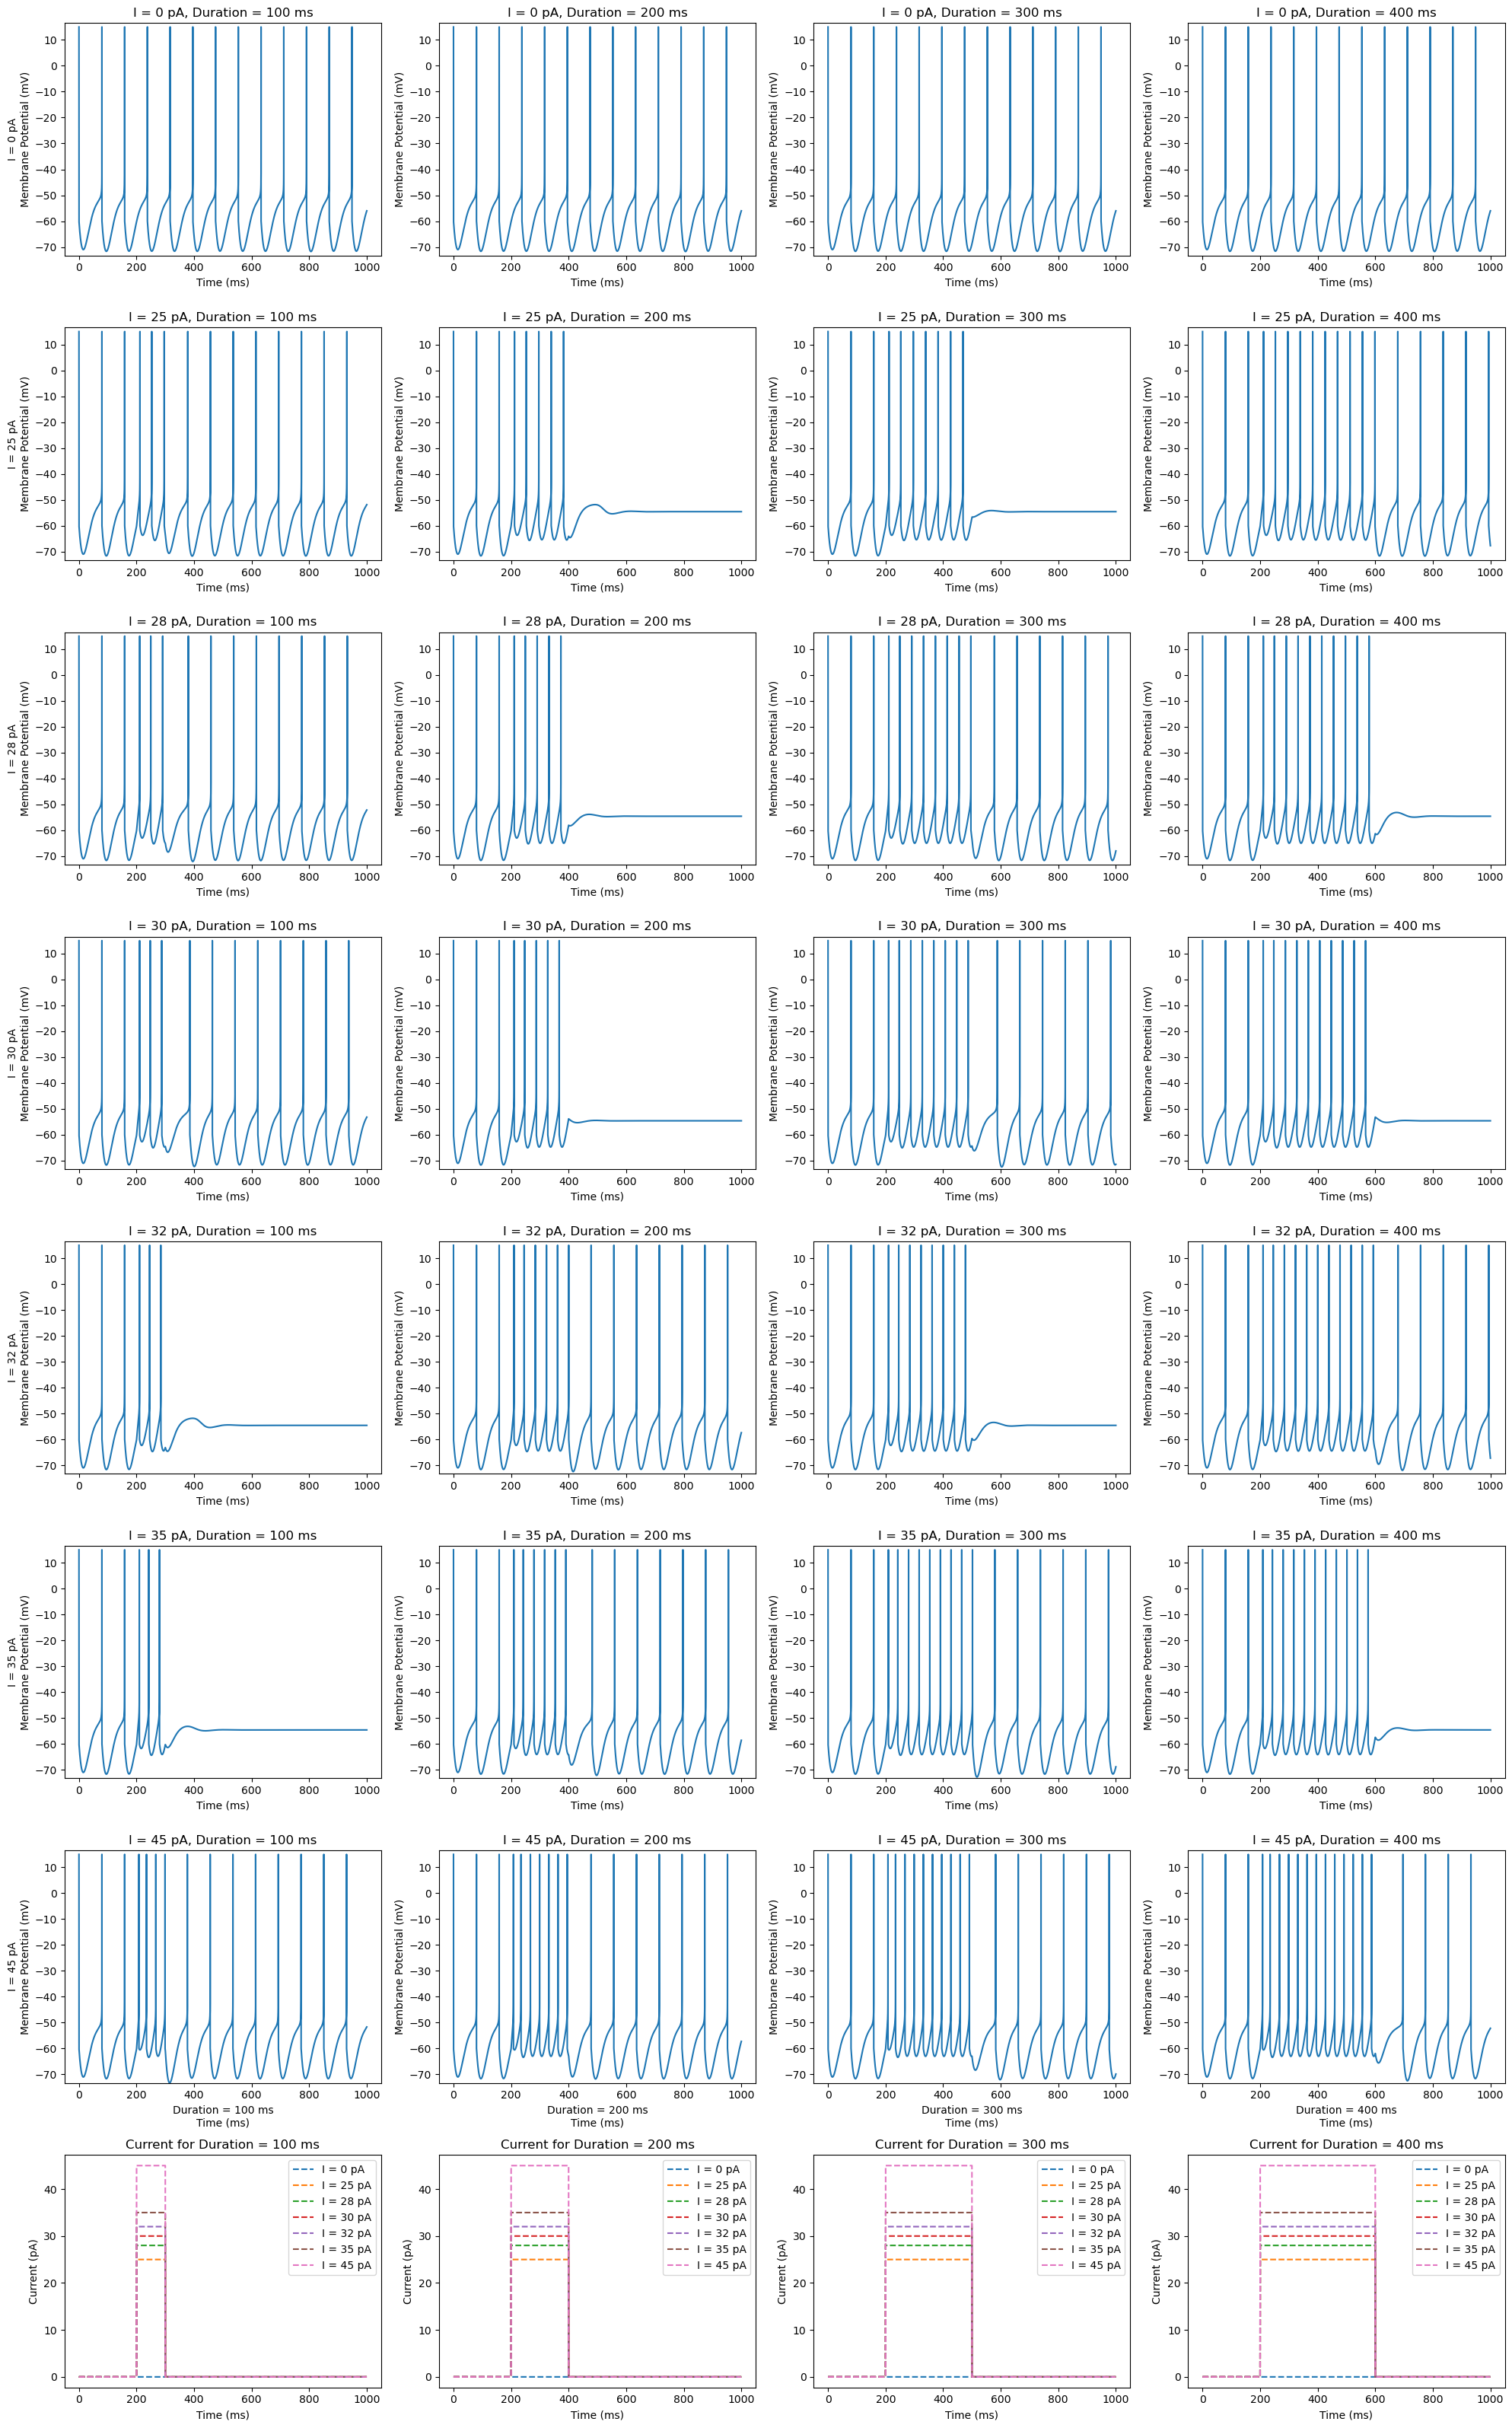

In [9]:
### v: 0mV
json_file = './params_ref/GPe_T1_1.json'  

# load parameters
params, model_name = load_params(json_file)

N = params.pop('N')['value']  
I_values = [0, 25, 28, 30, 32, 35, 45]
durations = [100, 200, 300, 400]  # Example durations in ms

# Run simulation
all_results, all_currents, total_time, injection_times = run_simulation(
    N, params, model_name, I_values, durations, injection_start_time = 200 * ms
)
# Plot results
plot_results(all_results, all_currents, I_values, total_time, injection_times, durations)

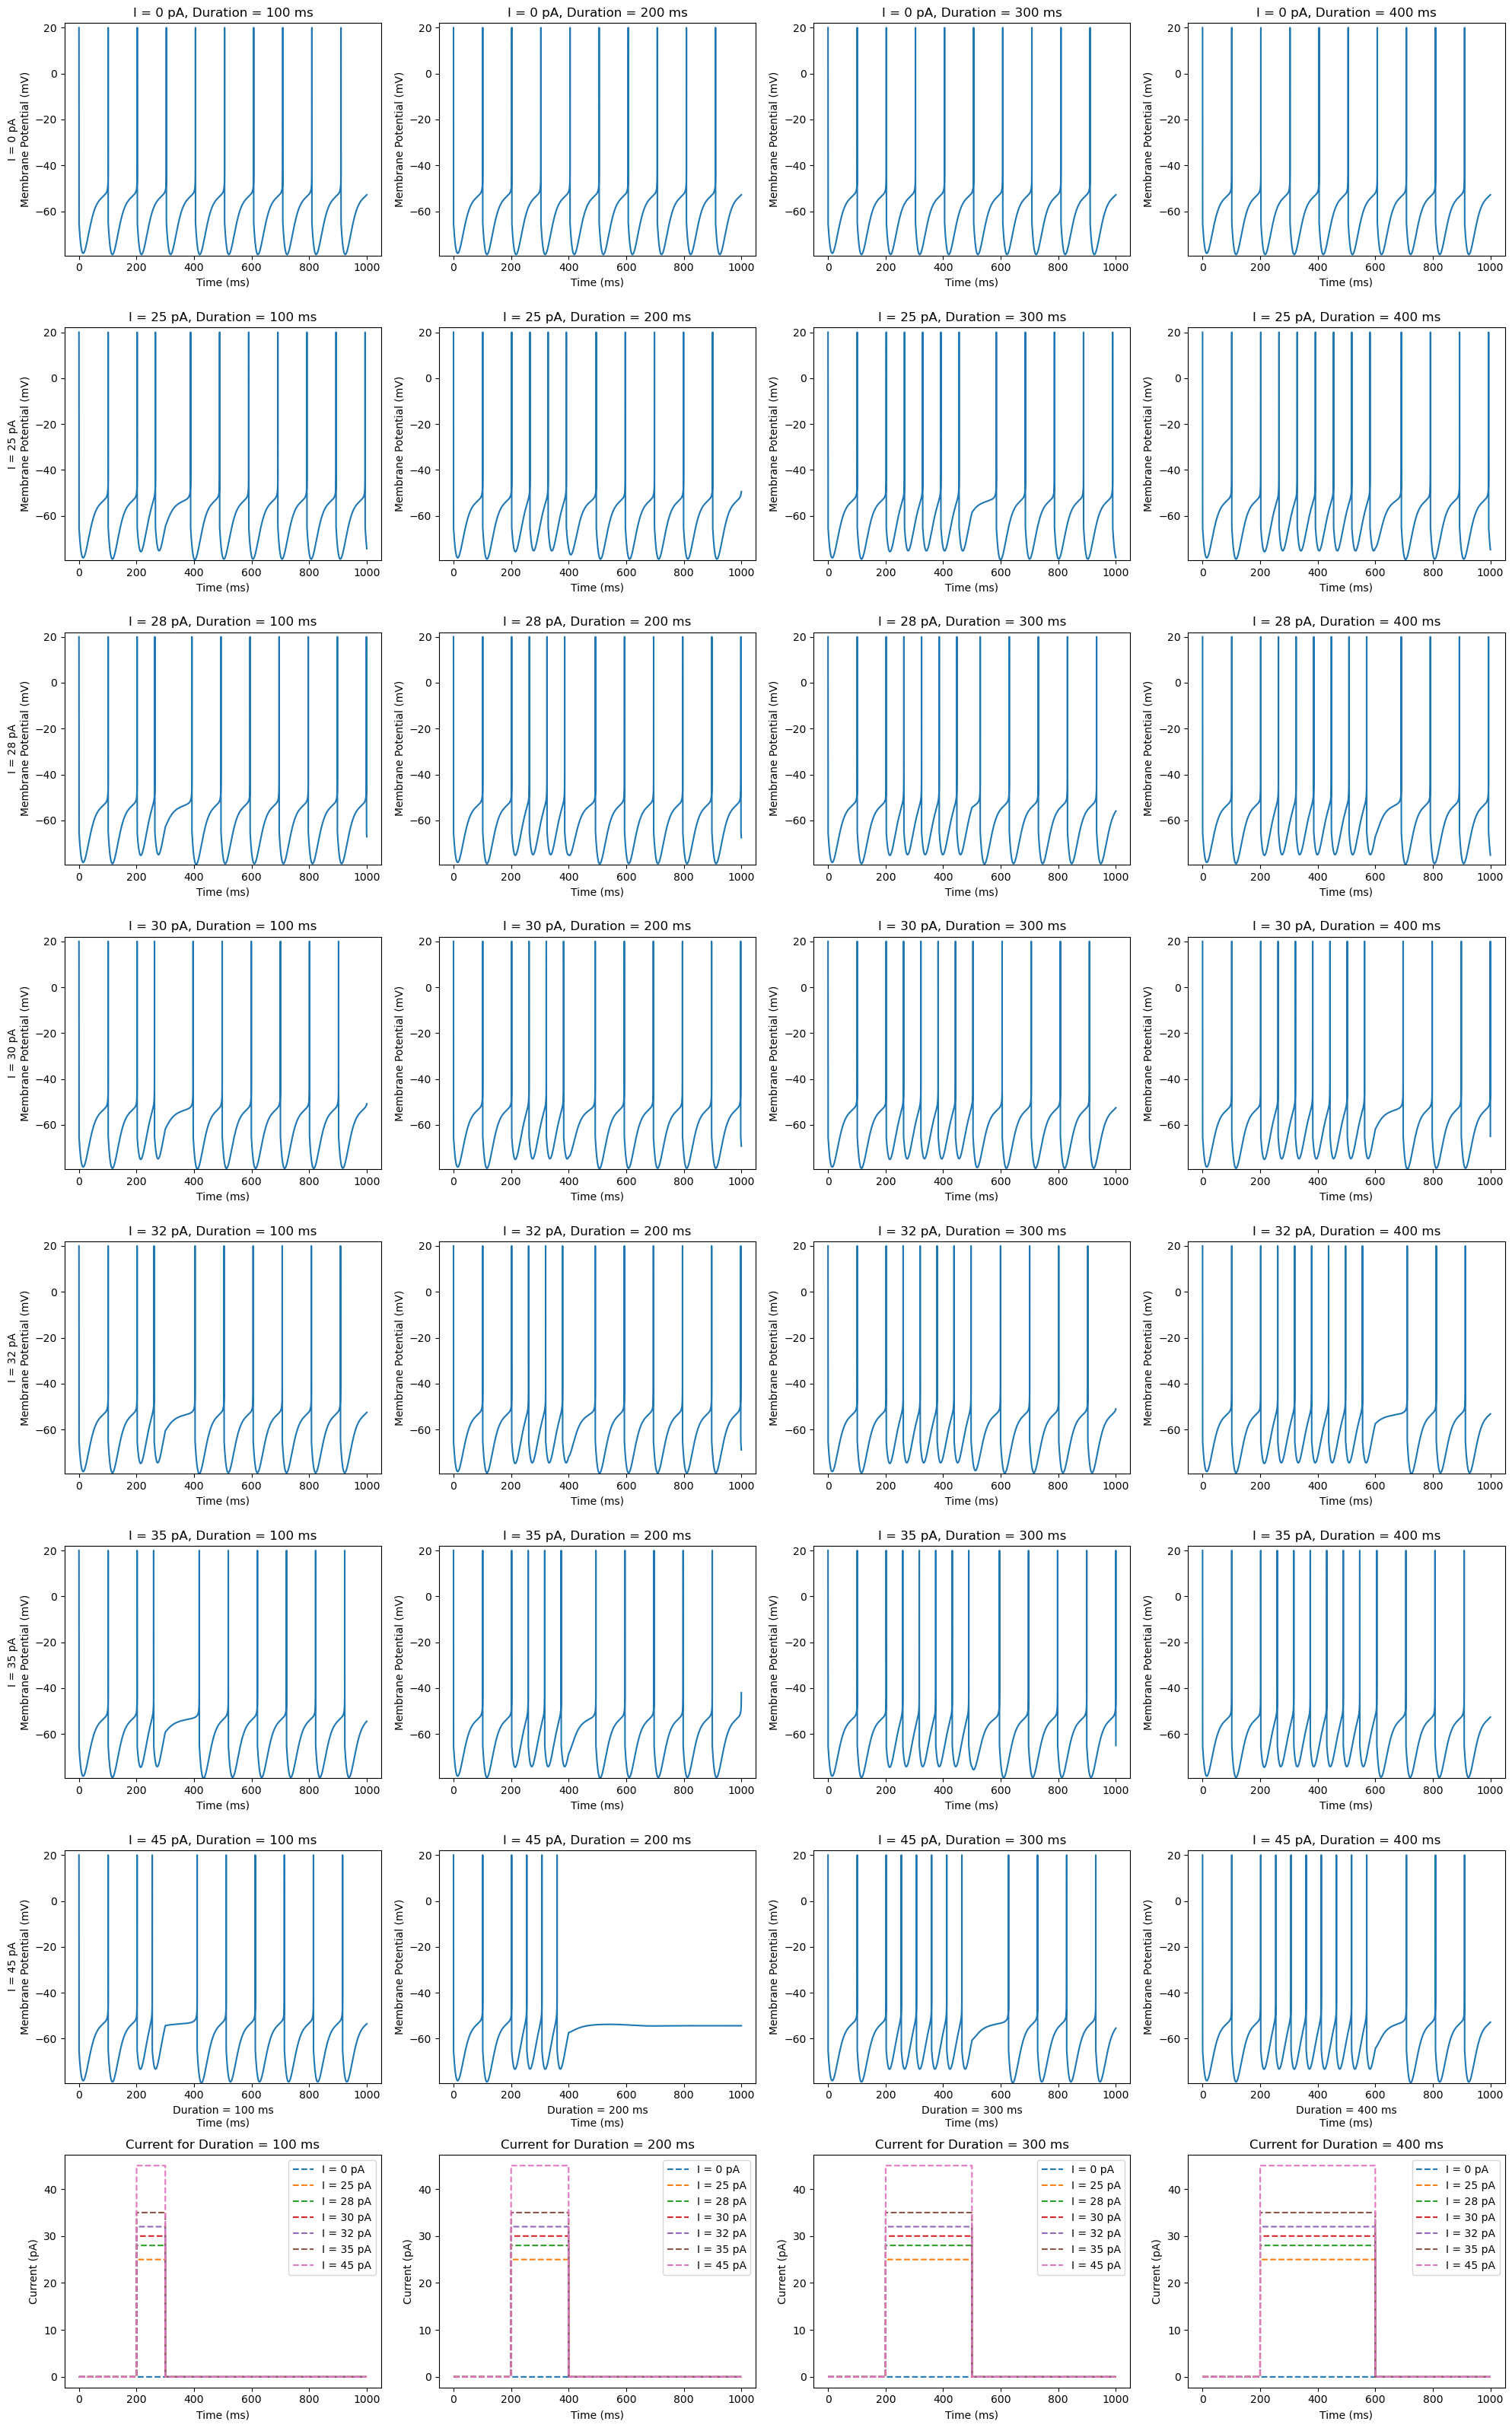

In [10]:
### v: 0mV
json_file = './params_ref/SNr_1.json'  

# load parameters
params, model_name = load_params(json_file)

N = params.pop('N')['value']  
I_values = [0, 25, 28, 30, 32, 35, 45]
durations = [100, 200, 300, 400]  # Example durations in ms

# Run simulation
all_results, all_currents, total_time, injection_times = run_simulation(
    N, params, model_name, I_values, durations, injection_start_time = 200 * ms
)
# Plot results
plot_results(all_results, all_currents, I_values, total_time, injection_times, durations)

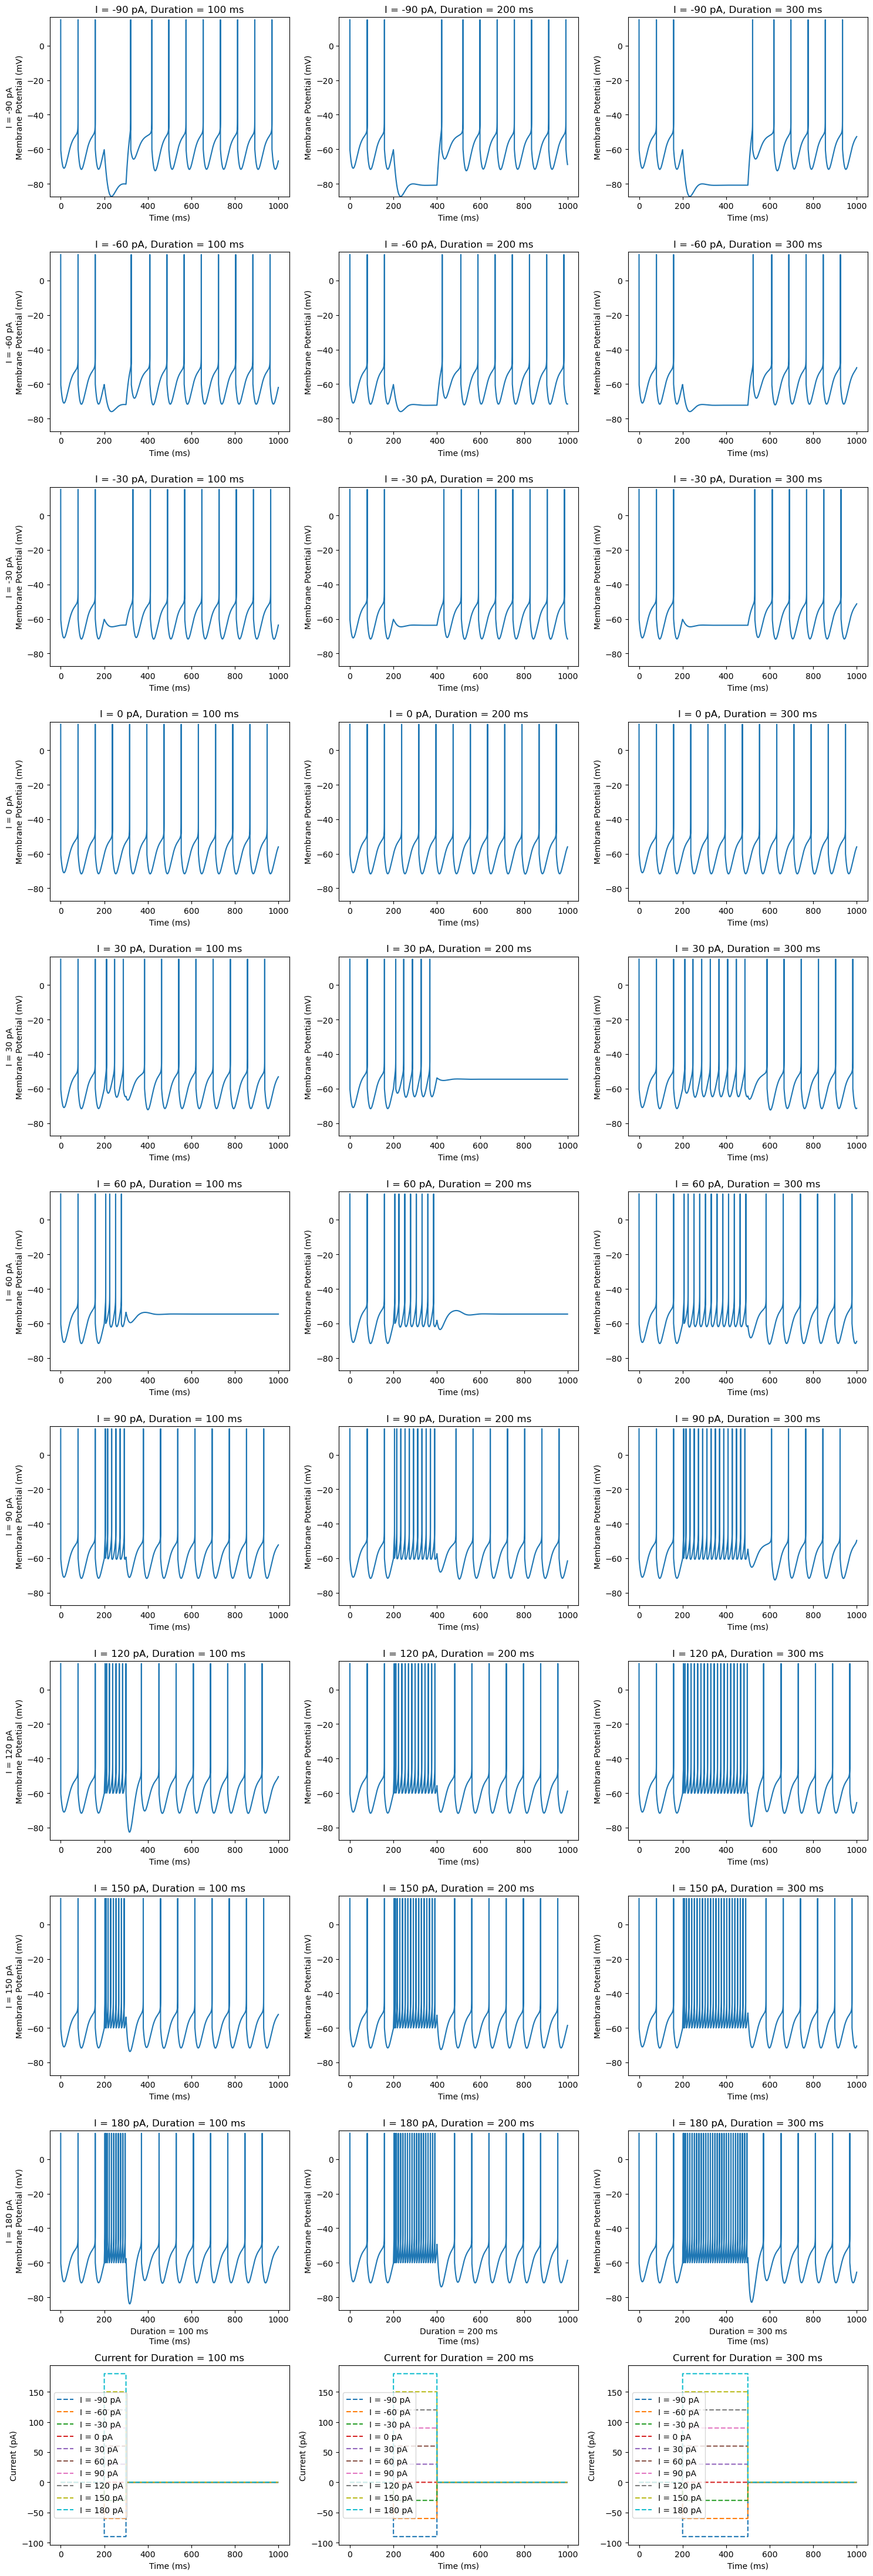

In [11]:
### v: 0mV vt set -30
json_file = './params_ref/GPe_T1_1.json'  

# load parameters
params, model_name = load_params(json_file)

N = params.pop('N')['value']  
I_values = [-90, -60, -30, 0, 30, 60, 90, 120, 150, 180]
durations = [100, 200, 300]  # Example durations in ms

# Run simulation
all_results, all_currents, total_time, injection_times = run_simulation(
    N, params, model_name, I_values, durations, injection_start_time = 200 * ms
)
# Plot results
plot_results(all_results, all_currents, I_values, total_time, injection_times, durations)